In [41]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
colors = ['#117733', '#882255', '#999933']

In [3]:
class joint_max_min():
    def __init__(self, P):
        self.F = poisson.cdf
        self.f = poisson.pmf
        self.P = P
        
    def pmf(self, x, y, mu):
        if x < y:
            return 0.
        elif x == y:
            return np.power( self.F(y, mu) - self.F(y-1., mu), self.P)
        elif x == y+1:
            return np.power( self.F(y+1., mu) - self.F(y-1., mu), self.P)\
                 - np.power( self.F(y+1., mu) - self.F(y, mu), self.P)\
                 - np.power( self.F(y, mu) - self.F(y-1., mu), self.P)
        else:
            return np.power( self.F(x, mu) - self.F(y-1., mu), self.P)\
                 + np.power( self.F(x-1., mu) - self.F(y, mu), self.P)\
                 - np.power( self.F(x, mu) - self.F(y, mu), self.P)\
                 - np.power( self.F(x-1., mu) - self.F(y-1., mu), self.P)
                    
    def cdf(self, x,y,mu):
        if x <= y:
            return np.power( self.F(x, mu), self.P)\
                  - np.power( self.F(x, mu) - self.F(y, mu), self.P)
        else:
            return np.power( self.F(x, mu), self.P)

In [4]:
class load_imbalance():
    range_for_convolution = 200
    def __init__(self, P):
        self.f_max_min = joint_max_min(P)
        
    def pmf(self, K, mu):
        p = 0
        for x in range(K,K+self.range_for_convolution):
            p += self.f_max_min.pmf(x,x-K,mu)
        return p
        

## Validation

In [66]:
np.random.seed(1234)
mu = 20.0
N_realizations = 100000
P = 16

In [36]:
s = poisson.rvs(mu, size=( N_realizations, P ) )
exp_joint_max_min = np.stack( (np.max( s, axis=1 ), np.min( s, axis=1)) )
exp_load_imbalance = exp_joint_max_min[0,:] - exp_joint_max_min[1,:] # i.e. max - min

#### Numerical Experiment

In [ ]:
bins = np.array( range( -1,np.max( exp_load_imbalance ) + 2 ) )
hist, bin_edges = np.histogram( exp_load_imbalance, bins=bins)
bin_centers = bins[:-1]
load_imbalance_cdf = np.cumsum( hist )

<IPython.core.display.Javascript object>


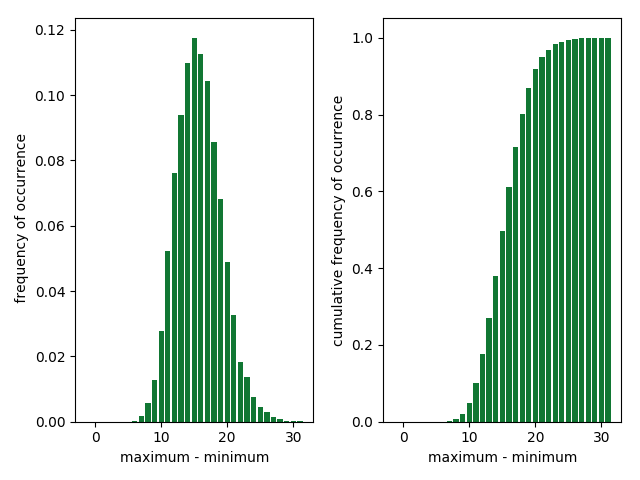

In [45]:
fig, axs = plt.subplots(1,2)
axs[0].bar(bin_centers, hist/float(N_realizations), color=colors[0])
axs[0].set_xlabel('maximum - minimum')
axs[0].set_ylabel(' frequency of occurrence')
axs[1].bar( bin_centers, load_imbalance_cdf/load_imbalance_cdf[-1], color=colors[0] )
axs[1].set_xlabel('maximum - minimum')
axs[1].set_ylabel('cumulative frequency of occurrence')
plt.tight_layout()

In [39]:
probabilities = np.zeros( shape=load_imbalance_cdf.shape )
load_bal = load_imbalance(P)
for K_i, K in enumerate(bin_centers[1:]):
    probabilities[K_i+1] += load_bal.pmf(K,mu)
cdf_predictions = np.cumsum( probabilities )

<IPython.core.display.Javascript object>


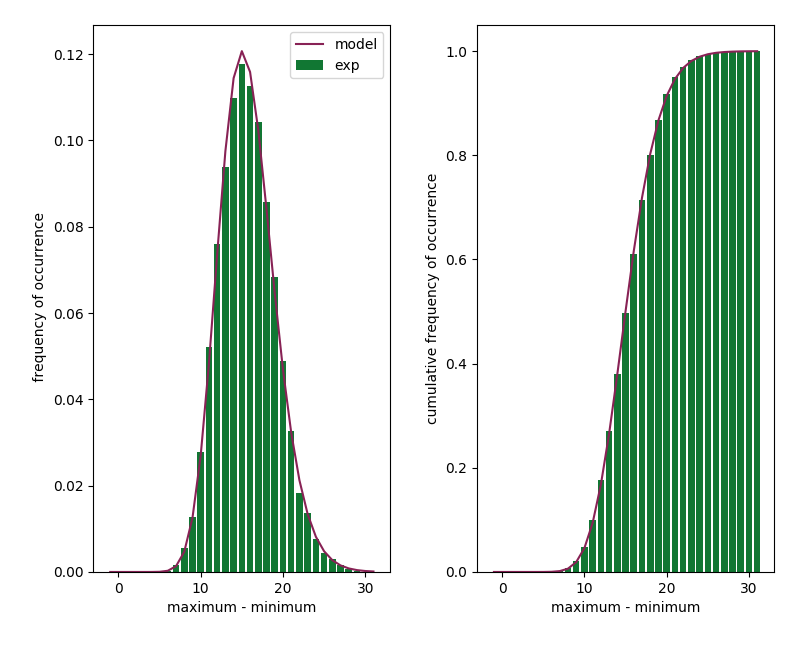

In [43]:
fig, axs = plt.subplots(1,2)
axs[0].bar(bin_centers, hist/float(N_realizations), color=colors[0], label='exp' )
axs[0].plot(bin_centers, probabilities, '-', color=colors[1], label='model')
axs[0].set_xlabel('maximum - minimum')
axs[0].set_ylabel(' frequency of occurrence')
axs[1].bar( bin_centers, load_imbalance_cdf/load_imbalance_cdf[-1], color=colors[0], label='exp' )
axs[1].plot(bin_centers, cdf_predictions, '-', color=colors[1], label='model')
axs[1].set_xlabel('maximum - minimum')
axs[1].set_ylabel('cumulative frequency of occurrence')
axs[0].legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


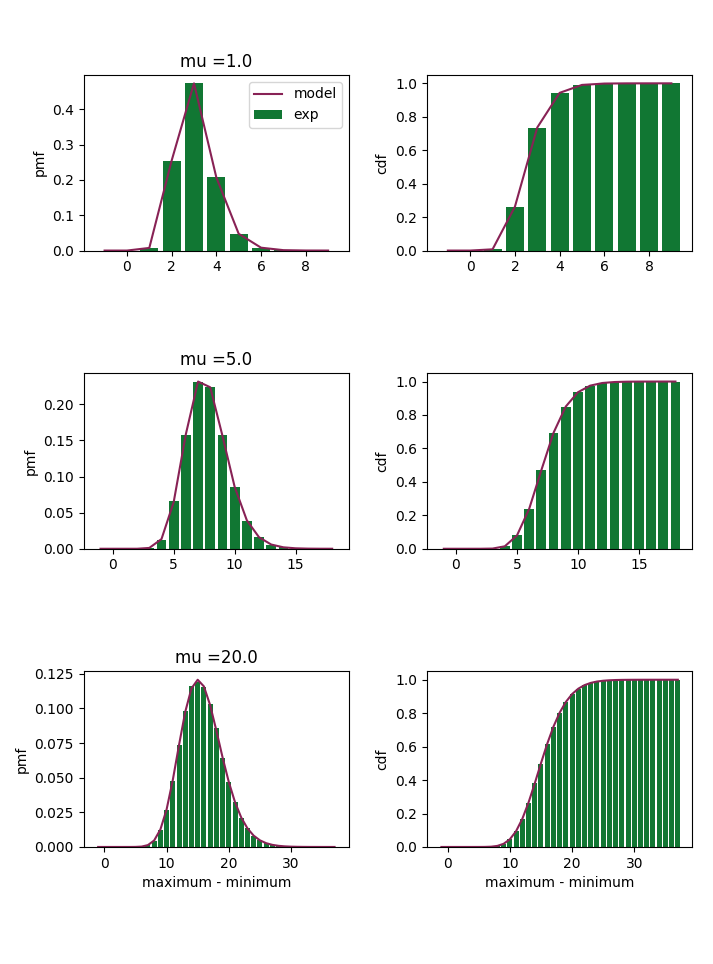

In [67]:
fig, axs = plt.subplots(3,2)
for i, mu in enumerate([1.0,5.,20.]):
    
    s = poisson.rvs(mu, size=( N_realizations, P ) )
    exp_joint_max_min = np.stack( (np.max( s, axis=1 ), np.min( s, axis=1)) )
    exp_load_imbalance = exp_joint_max_min[0,:] - exp_joint_max_min[1,:] # i.e. max - min
    
    bins = np.array( range( -1,np.max( exp_load_imbalance ) + 2 ) )
    hist, bin_edges = np.histogram( exp_load_imbalance, bins=bins)
    bin_centers = bins[:-1]
    load_imbalance_cdf = np.cumsum( hist )
    
    probabilities = np.zeros( shape=load_imbalance_cdf.shape )
    load_bal = load_imbalance(P)
    for K_i, K in enumerate(bin_centers[1:]):
        probabilities[K_i+1] += load_bal.pmf(K,mu)
    cdf_predictions = np.cumsum( probabilities )
    
    axs[i][0].bar(bin_centers, hist/float(N_realizations), color=colors[0], label='exp' )
    axs[i][0].plot(bin_centers, probabilities, '-', color=colors[1], label='model')
    axs[i][1].bar( bin_centers, load_imbalance_cdf/load_imbalance_cdf[-1], color=colors[0], label='exp' )
    axs[i][1].plot(bin_centers, cdf_predictions, '-', color=colors[1], label='model')
    
    axs[i][0].set_ylabel('pmf')
    axs[i][1].set_ylabel('cdf')
    
    axs[i][0].set_title('mu ='+str(mu))
    
    
    
axs[0][0].legend()
axs[-1][0].set_xlabel('maximum - minimum')
axs[-1][1].set_xlabel('maximum - minimum')

plt.tight_layout()
    